In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

<b>About this Script: </b>

The main objective of this script is to find the Gap in roles (SOC4) per region. For this job, the predictions made with the New Ads dataset (Scripts 1.1, 1.2) and an aggregated dataset of SOC2 projections made by each location in the ‘Local skilled improvement plan’ will be used.

The LSIP dataset contains the real size (number of people) by SOC2 per Local Authority until 2022 and then Projections (made by the Government)for each SOC2. This dataset was created using each LSIP projections (From a total of 38 LSIP). 

The SOC4 that are important for the partner (Based on Script 1.1 results) to work with will be:
- Programmers and software development professionals - SOC2134 (Wei.Roles Index: 1.252369)
- IT Managers - SOC2132 (Wei.Roles Index: 0.054619)
- Business and financial project management professionals - SOC2440  (Wei.Roles Index: 0.035561)
- IT project managers - SOC2131  (Wei.Roles Index: 0.004035)

<br>
<br>
<b> "Gap Index": </b>

We will create a "GAP index" using the Predictions on New Ads for 2025 (1.1 and 1.2 Script Results) and the Projections made by the LSIP government project for each SOC2 for 2025. 

The "GAP index" assumed that if the amount of new jobs is growing and advertised it's because
- Employees can't find the right skills for some roles in their own companies.
- Employees are openning new roles are open in that SOC4.

The "GAP index" will be calculated for each SOC4 mentioned above, following this equation:

<b> SOC4 NewAds per Region Projected 2025 / SOC4 Regional Size of Market (based on LSIP Projection 2025)


# Understanding the LSIP Dataset:

In [2]:
lsip_data = pd.read_excel("Data/LSIP_sum.xlsx",header = 0)

In [3]:
lsip_data

,LSIP,SOC-2 Digits,Occupation name-2 digit,2015,2019,2020,2025,2035
0,Buckinghamshire,11,Corporate managers and directors,20901,25532,25793,23548,25420
1,Buckinghamshire,12,Other managers and proprietors,9711,10399,10321,10860,12182
2,Buckinghamshire,21,"Science, research, engineering and technology ...",17747,20256,20835,25423,28418
3,Buckinghamshire,22,Health professionals,8878,10901,10868,10545,10869
4,Buckinghamshire,23,Teaching and other educational professionals,12342,13138,13246,12819,13568
...,...,...,...,...,...,...,...,...
983,York and North Yorkshire,72,Customer service occupations,7876,7817,8310,9339,10626
984,York and North Yorkshire,81,"Process, plant and machine operatives",17371,16028,14772,15158,13590
985,York and North Yorkshire,82,Transport and mobile machine drivers and opera...,17569,15738,14841,14856,14152
986,York and North Yorkshire,91,Elementary trades and related occupations,10677,8691,7794,13880,15510


In [4]:
lsip_data.rename(columns = {"SOC-2 Digits": "SOC2", "Occupation name-2 digit": "SOC2_Name", 2015: "2015",2019: "2019", 2020: "2020", 2025:"Proj2025", 2035:"Proj2035"}, inplace = True)

In [5]:
lsip_data.LSIP.unique()

array(['Buckinghamshire', 'Brighton and Hove East Sussex West',
       'Cambridgeshire and Peterborough',
       'Cornwall and the Isles of Scilly', 'Cumbria',
       'Derbyshire and Nottinghamshire', 'Dorset',
       'Cheshire and Warrington',
       'Enterprise M3 LEP (including all of Surrey)',
       'Essex Southend-on-Sea and Thurrock', 'Gloucestershire',
       'Greater Lincolnshire', 'Greater London', 'Greater Manchester',
       'Heart of the South-West', 'Hertfordshire',
       'Hull and East Yorkshire', 'Kent and Medway', 'Lancashire',
       'Leicester and Leicestershire', 'Liverpool City Region',
       'Norfolk and Suffolk', 'North East', 'North of Tyne',
       'Oxfordshire', 'Solent', 'South East Midlands', 'South Yorkshire',
       'Stoke-on-Trent and Staffordshire', 'Swindon and Wiltshire',
       'Tees Valley', 'Thames Valley Berkshire', 'The Marches',
       'West Midlands and Warwickshire',
       'West of England and North Somerset', 'West Yorkshire',
       'Worce

## Adding Region to LSIP:

Following "How" Regions is separated by LSIP: 

https://www.gov.uk/government/publications/designated-employer-representative-bodies/notice-of-designated-employer-representative-bodies



In [6]:
region_lsip = {
    'Buckinghamshire': "South East" , 
    'Brighton and Hove East Sussex West' :"South East",
    'Cambridgeshire and Peterborough' : "East of England",
    'Cornwall and the Isles of Scilly' : "South West", 
    'Cumbria' :"North West",
    'Derbyshire and Nottinghamshire' :"East Midlands",
    'Dorset' : "South West",
    'Cheshire and Warrington' :"North West",
    'Enterprise M3 LEP (including all of Surrey)' : "South East",
    'Essex Southend-on-Sea and Thurrock' :"East of England", 
    'Gloucestershire' : "South West",
    'Greater Lincolnshire' :"East Midlands", 
    'Greater London' : "London", 
    'Greater Manchester' :"North West",
    'Heart of the South-West' :"South West",
    'Hertfordshire' :"East of England",
    'Hull and East Yorkshire' : "Yorkshire and The Humber", 
    'Kent and Medway' : "South East", 
    'Lancashire' :"North West",
    'Leicester and Leicestershire' :"East Midlands", 
    'Liverpool City Region' :"North West",
    'Norfolk and Suffolk' :"East of England",
    'North East' : "North East", 
    'North of Tyne' :"North East",
    'Oxfordshire' : "South East",
    'Solent' : "South East", 
    'South East Midlands' :"East Midlands", 
    'South Yorkshire' :"Yorkshire and The Humber",
    'Stoke-on-Trent and Staffordshire' : "West Midlands", 
    'Swindon and Wiltshire' :"South West",
    'Tees Valley' :"North East", 
    'Thames Valley Berkshire' : "South East", 
    'The Marches' :"West Midlands",
    'West Midlands and Warwickshire' :"West Midlands",
    'West of England and North Somerset' :"South West", 
    'West Yorkshire' :"Yorkshire and The Humber",
   'Worcestershire' :"West Midlands", 
    'York and North Yorkshire' :"Yorkshire and The Humber"
}

In [7]:
# Adding the Region
lsip_data["Region"] = lsip_data['LSIP'].map(region_lsip)
lsip_data.head(5)

,LSIP,SOC2,SOC2_Name,2015,2019,2020,Proj2025,Proj2035,Region
0,Buckinghamshire,11,Corporate managers and directors,20901,25532,25793,23548,25420,South East
1,Buckinghamshire,12,Other managers and proprietors,9711,10399,10321,10860,12182,South East
2,Buckinghamshire,21,"Science, research, engineering and technology ...",17747,20256,20835,25423,28418,South East
3,Buckinghamshire,22,Health professionals,8878,10901,10868,10545,10869,South East
4,Buckinghamshire,23,Teaching and other educational professionals,12342,13138,13246,12819,13568,South East


In [8]:
lsip_data.Region.value_counts()

South East                  182
South West                  156
North West                  130
East of England             104
East Midlands               104
Yorkshire and The Humber    104
West Midlands               104
North East                   78
London                       26
Name: Region, dtype: int64

In [9]:
lsip_data.SOC2.unique()

array([11, 12, 21, 22, 23, 24, 31, 32, 33, 34, 35, 41, 42, 51, 52, 53, 54,
       61, 62, 63, 71, 72, 81, 82, 91, 92])

In [10]:
lsip_data.SOC2.nunique()

26

In [11]:
# Adding Region-SOCnumber
lsip_data["Region-SOC2"] =lsip_data["Region"] + "-SOC" + lsip_data["SOC2"].astype(str)


In [12]:
lsip_region = lsip_data[["Region-SOC2", "Proj2025" ]].groupby(by = "Region-SOC2").sum().reset_index()

In [13]:
lsip_region

,Region-SOC2,Proj2025
0,East Midlands-SOC11,209401
1,East Midlands-SOC12,106024
2,East Midlands-SOC21,230682
3,East Midlands-SOC22,123521
4,East Midlands-SOC23,112619
...,...,...
229,Yorkshire and The Humber-SOC72,56141
230,Yorkshire and The Humber-SOC81,85454
231,Yorkshire and The Humber-SOC82,92485
232,Yorkshire and The Humber-SOC91,80516


# Results 1.2 Script: NewAds per Region and SOC 2

In [14]:
region_pred = pd.read_csv("Data/soc2Region_results2025.csv")

In [15]:
region_pred.head(2)

,Region-SOC2,SOC2,SOC 2 digit label,Intercept,Coefficient,WeightedRoles,Value
0,South West-SOC11,11,Corporate managers and directors,3327.290323,-8.038306,-0.028084,37792.0
1,East of England-SOC11,11,Corporate managers and directors,3308.793548,-7.856048,-0.027461,37811.0


In [16]:
#Getting the SOC2
region_pred[['Region', 'SOC21']] = region_pred['Region-SOC2'].str.split('-', expand=True)
region_pred.drop(columns = "SOC21", inplace = True)
region_pred.head(2)

,Region-SOC2,SOC2,SOC 2 digit label,Intercept,Coefficient,WeightedRoles,Value,Region
0,South West-SOC11,11,Corporate managers and directors,3327.290323,-8.038306,-0.028084,37792.0,South West
1,East of England-SOC11,11,Corporate managers and directors,3308.793548,-7.856048,-0.027461,37811.0,East of England


In [17]:
region_pred.Region.unique()

array(['South West', 'East of England', 'North East', 'West Midlands',
       'East Midlands', 'South East', 'North West', 'London',
       'Yorkshire and The Humber'], dtype=object)

In [18]:
# Asserting we have the same number of 
assert region_pred.SOC2.nunique() == lsip_data.SOC2.nunique()

# Results 1.1 Script - NewAds Predictions SOC4 -  2025

In [19]:
soc4_results = pd.read_csv("Data/soc4_results2025.csv")

In [20]:
soc4_results.head(5)

,SOC4,Intercept,Coefficient,SOC 4 digit label,SOC2,Value,WeightedRoles
0,1172.0,178.933871,-0.873891,Social services managers and directors,11,7549.0,-0.000550
1,1171.0,569.193548,-2.410786,Health services and public health managers and...,11,24696.0,-0.004968
2,1112.0,229.645161,-2.144153,Elected officers and representatives,11,8504.0,-0.001521
3,1111.0,228.543548,-2.115121,Chief executives and senior officials,11,8403.0,-0.001483
4,1150.0,519.848387,-1.907359,Managers and directors in retail and wholesale,11,22739.0,-0.003619


Classified as "important" for the partner. Based on WeightedRoles and the partner platform skills: <br>

- Programmers and software development professionals - SOC2134 (Wei.Roles Index: 1.252369)
- IT Managers - SOC2132 (Wei.Roles Index: 0.054619)
- Business and financial project management professionals - SOC2440  (Wei.Roles Index: 0.035561)
- IT project managers - SOC2131  (Wei.Roles Index: 0.004035)


# Finding the SOC4 NewAds per Region

<b> We have the SOC4 per UK and the SOC2 per Region (Predictions for 2025). --> We need the SOC4 per Region

With the SOC4 Results (1.1) we will calculate the % of each SOC4 inside their SOC2 family based on the 2025 predictions (NEW ADS). Then we will use this % to estimate the amount SOC4 on the SOC2PerRegion results (Result 1.2).

<b> <u>Process to get this: </b> </u>  <br> <br>
<b> Find the % of important SOC4 inside their SOC2 Family (Based on 1.1 Script Results) --> Multiply this % in the SOC2 
 results (Based on 1.2 Script Results) == This will give us the estimate of # New Ads of the relevant SOC4 by Region.

This analysis is only in the 4 SOC classified as important for the partner:

## SOC 21 Family

For: 

- Programmers and software development professionals - SOC2134 (Wei.Roles Index: 1.252369)
- IT Managers - SOC2132 (Wei.Roles Index: 0.054619)
- IT project managers - SOC2131  (Wei.Roles Index: 0.004035)

In [21]:
soc4_soc21 = soc4_results[soc4_results["SOC2"] == 21][["SOC4","SOC 4 digit label", "Value"]]
soc4_soc21.rename(columns = {"Value":"NewAdsProj2025"}, inplace = True)
soc4_soc21

,SOC4,SOC 4 digit label,NewAdsProj2025
42,2161.0,Research and development (R&D) managers,31455.0
43,2162.0,"Other researchers, unspecified discipline",3998.0
44,2121.0,Civil engineers,39185.0
45,2136.0,IT quality and testing professionals,12802.0
46,2114.0,Physical scientists,7571.0
47,2113.0,Biochemists and biomedical scientists,15093.0
48,2115.0,Social and humanities scientists,14396.0
49,2142.0,Graphic and multimedia designers,23556.0
50,2126.0,Aerospace engineers,2223.0
51,2137.0,IT network professionals,16350.0


In [22]:
# Getting the total of the Proj2025 for 21 Family
total_soc2_21 = soc4_results[soc4_results["SOC2"] == 21].Value.sum()

In [23]:
soc4_soc21["Percentage"] = soc4_soc21.NewAdsProj2025/total_soc2_21
soc4_soc21

,SOC4,SOC 4 digit label,NewAdsProj2025,Percentage
42,2161.0,Research and development (R&D) managers,31455.0,0.029007
43,2162.0,"Other researchers, unspecified discipline",3998.0,0.003687
44,2121.0,Civil engineers,39185.0,0.036135
45,2136.0,IT quality and testing professionals,12802.0,0.011806
46,2114.0,Physical scientists,7571.0,0.006982
47,2113.0,Biochemists and biomedical scientists,15093.0,0.013918
48,2115.0,Social and humanities scientists,14396.0,0.013276
49,2142.0,Graphic and multimedia designers,23556.0,0.021723
50,2126.0,Aerospace engineers,2223.0,0.002050
51,2137.0,IT network professionals,16350.0,0.015077


In [24]:
# Getting the %: 
soc2134 = soc4_soc21[soc4_soc21["SOC4"] == 2134].iloc[0].Percentage
soc2131 = soc4_soc21[soc4_soc21["SOC4"] == 2131].iloc[0].Percentage
soc2132 = soc4_soc21[soc4_soc21["SOC4"] == 2132].iloc[0].Percentage

In [25]:
soc2134, soc2131, soc2132

(0.27998354855159935, 0.029212386907819327, 0.1082475795437674)

## SOC 24 Family

For: 
- Business and financial project management professionals - SOC2440  (Wei.Roles Index: 0.035561)

In [26]:
soc4_soc24 = soc4_results[soc4_results["SOC2"] == 24][["SOC4","SOC 4 digit label", "Value"]]

In [27]:
total_soc2_24 = soc4_results[soc4_results["SOC2"] == 24].Value.sum()

In [28]:
soc4_soc24["Percentage"] = soc4_soc24.Value/total_soc2_24
soc4_soc24.rename(columns = {"Value":"NewAdsProj2025"}, inplace = True)
soc4_soc24

,SOC4,SOC 4 digit label,NewAdsProj2025,Percentage
107,2455.0,Construction project managers and related prof...,16354.0,0.015472
108,2453.0,Quantity surveyors,61569.0,0.058248
109,2412.0,Solicitors and lawyers,97008.0,0.091776
110,2461.0,Social workers,62525.0,0.059153
111,2462.0,Probation officers,2289.0,0.002166
112,2452.0,"Chartered architectural technologists, plannin...",14292.0,0.013521
113,2451.0,Architects,13181.0,0.012470
114,2423.0,Taxation experts,33948.0,0.032117
115,2432.0,Marketing and commercial managers,70024.0,0.066247
116,2433.0,"Actuaries, economists and statisticians",37524.0,0.035500


In [29]:
# Getting the %: 
soc2440 = soc4_soc24[soc4_soc24["SOC4"] == 2440].iloc[0].Percentage

In [30]:
soc2440

0.13300877094226846

# Finding the Size of the Labour Market for every SOC4

There are no available projections for 2025 by SOC4. We will estimate the real % of jobs of each SOC4 per SOC2 family. Then we will multiply this % by each Projection 2025 per Region (LSIP dataset) to get the best estimate possible.

We are going to make this process with the most "new" real data: Census 2021.There are no available projections for 2025 by SOC4.

<b> Process: </b>

Get the % SOC4 jobs on SOC2 Family (Census Data) --> Multiply this % in the LSIP dataset per region. (LSIP regional 25 Projections for every SOC2

Assumption: The % find in the Census2021 shows us the proportion by 2021.

## Calculating the ratio of each SOC4  on the LSIP projections for 2025 based on Real Data (Census 2021)

### Loading Census Dataset:

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/datasets/occupationsofthoseinemploymentbyageandsexenglandandwalescensus2021

In [31]:
# Loading Census 2021 Dataset:

census2021 = pd.read_excel("Data/censusoccupationsagesex4digitenglandandwales.xlsx",header = 7, sheet_name = "1")
census2021.head(5)

,SOC2020 Unit Group,SOC2020 Group Title [note 1],Age,Sex,Population estimate,Percentage estimate
0,1111,Chief executives and senior officials,Aged 16 to 19 years,Female,30,0.1
1,1112,Elected officers and representatives,Aged 16 to 19 years,Female,[c],[c]
2,1121,Production managers and directors in manufactu...,Aged 16 to 19 years,Female,155,0.3
3,1122,Production managers and directors in construction,Aged 16 to 19 years,Female,80,0.2
4,1123,Production managers and directors in mining an...,Aged 16 to 19 years,Female,[c],[c]


In [32]:
census2021['SOC2'] = census2021['SOC2020 Unit Group'].astype(str)
census2021['SOC2'] = census2021["SOC2"].str[:2]
census2021['SOC2'] = census2021["SOC2"].astype(int)
census2021

,SOC2020 Unit Group,SOC2020 Group Title [note 1],Age,Sex,Population estimate,Percentage estimate,SOC2
0,1111,Chief executives and senior officials,Aged 16 to 19 years,Female,30,0.1,11
1,1112,Elected officers and representatives,Aged 16 to 19 years,Female,[c],[c],11
2,1121,Production managers and directors in manufactu...,Aged 16 to 19 years,Female,155,0.3,11
3,1122,Production managers and directors in construction,Aged 16 to 19 years,Female,80,0.2,11
4,1123,Production managers and directors in mining an...,Aged 16 to 19 years,Female,[c],[c],11
...,...,...,...,...,...,...,...
9059,9264,Waiters and waitresses,Aged 65 years and over,Male,550,1.3,92
9060,9265,Bar staff,Aged 65 years and over,Male,845,2.1,92
9061,9266,Coffee shop workers,Aged 65 years and over,Male,55,0.4,92
9062,9267,Leisure and theme park attendants,Aged 65 years and over,Male,450,5.6,92


In [33]:
census2021.replace('[c]', 0, inplace=True)
census2021.replace(np.NaN, 0, inplace=True)
census2021

,SOC2020 Unit Group,SOC2020 Group Title [note 1],Age,Sex,Population estimate,Percentage estimate,SOC2
0,1111,Chief executives and senior officials,Aged 16 to 19 years,Female,30,0.1,11
1,1112,Elected officers and representatives,Aged 16 to 19 years,Female,0,0.0,11
2,1121,Production managers and directors in manufactu...,Aged 16 to 19 years,Female,155,0.3,11
3,1122,Production managers and directors in construction,Aged 16 to 19 years,Female,80,0.2,11
4,1123,Production managers and directors in mining an...,Aged 16 to 19 years,Female,0,0.0,11
...,...,...,...,...,...,...,...
9059,9264,Waiters and waitresses,Aged 65 years and over,Male,550,1.3,92
9060,9265,Bar staff,Aged 65 years and over,Male,845,2.1,92
9061,9266,Coffee shop workers,Aged 65 years and over,Male,55,0.4,92
9062,9267,Leisure and theme park attendants,Aged 65 years and over,Male,450,5.6,92


### SOC 21 Family:

In [34]:
census_2021_SOC21 = census2021[census2021["SOC2"]==21][["SOC2020 Unit Group","SOC2","Population estimate"]].groupby(by="SOC2020 Unit Group").sum()
census_2021_SOC21["%"] = census_2021_SOC21["Population estimate"] / census_2021_SOC21["Population estimate"].sum()
census_2021_SOC21

,SOC2,Population estimate,%
SOC2020 Unit Group,,,
2111,462,9410,0.006761
2112,462,14525,0.010437
2113,462,37190,0.026722
2114,462,8035,0.005773
2115,462,9065,0.006514
2119,462,19485,0.014001
2121,462,59940,0.043069
2122,462,95865,0.068883
2123,462,26295,0.018894


In [35]:
SOC2132_census_perc = census_2021_SOC21.loc[2132]["%"]
SOC2131_census_perc = census_2021_SOC21.loc[2131]["%"]
SOC2134_census_perc = census_2021_SOC21.loc[2134]["%"]

In [36]:
SOC2132_census_perc,SOC2131_census_perc,SOC2134_census_perc

(0.10521550748536877, 0.025367981231789554, 0.1897443082815088)

### SOC 24 Family

In [37]:
census_2021_SOC24 = census2021[census2021["SOC2"]==24][["SOC2020 Unit Group","SOC2","Population estimate"]].groupby(by="SOC2020 Unit Group").sum()
census_2021_SOC24["%"] = census_2021_SOC24["Population estimate"] / census_2021_SOC24["Population estimate"].sum()

In [38]:
census_2021_SOC24

,SOC2,Population estimate,%
SOC2020 Unit Group,,,
2411,528,24680,0.013771
2412,528,136690,0.076272
2419,528,63840,0.035622
2421,528,170705,0.095252
2422,528,184985,0.103220
2423,528,29385,0.016397
2431,528,119240,0.066535
2432,528,81800,0.045644
2433,528,36235,0.020219


In [39]:
SOC2440_census_perc = census_2021_SOC24.loc[2440]["%"]

In [40]:
SOC2440_census_perc 

0.11266729347956488

## Creating the Projections2025 for every SOC4 based on % found above:

### SOC 21 Family

In [41]:
lsip_region['SOC2'] = lsip_region['Region-SOC2'].str[-2:]
lsip_region

,Region-SOC2,Proj2025,SOC2
0,East Midlands-SOC11,209401,11
1,East Midlands-SOC12,106024,12
2,East Midlands-SOC21,230682,21
3,East Midlands-SOC22,123521,22
4,East Midlands-SOC23,112619,23
...,...,...,...
229,Yorkshire and The Humber-SOC72,56141,72
230,Yorkshire and The Humber-SOC81,85454,81
231,Yorkshire and The Humber-SOC82,92485,82
232,Yorkshire and The Humber-SOC91,80516,91


In [42]:
lsip_region_SOC21 = lsip_region[lsip_region["SOC2"] == "21"]

In [43]:
lsip_region_SOC21["2134_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2134_census_perc,0)

/tmp/ipykernel_148895/3121902890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsip_region_SOC21["2134_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2134_census_perc,0)


In [44]:
lsip_region_SOC21

,Region-SOC2,Proj2025,SOC2,2134_Proj2025
2,East Midlands-SOC21,230682,21,43771.0
28,East of England-SOC21,246005,21,46678.0
54,London-SOC21,542571,21,102950.0
80,North East-SOC21,70064,21,13294.0
106,North West-SOC21,255823,21,48541.0
132,South East-SOC21,382282,21,72536.0
158,South West-SOC21,263690,21,50034.0
184,West Midlands-SOC21,206810,21,39241.0
210,Yorkshire and The Humber-SOC21,163471,21,31018.0


In [45]:
lsip_region_SOC21["2131_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2131_census_perc,0)

/tmp/ipykernel_148895/839963877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsip_region_SOC21["2131_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2131_census_perc,0)


In [46]:
lsip_region_SOC21["2132_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2132_census_perc,0)

/tmp/ipykernel_148895/1853280500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsip_region_SOC21["2132_Proj2025"] = round(lsip_region_SOC21.Proj2025*SOC2132_census_perc,0)


In [47]:
SOC2134_census_perc,SOC2132_census_perc,SOC2131_census_perc

(0.1897443082815088, 0.10521550748536877, 0.025367981231789554)

In [48]:
lsip_region_SOC21

,Region-SOC2,Proj2025,SOC2,2134_Proj2025,2131_Proj2025,2132_Proj2025
2,East Midlands-SOC21,230682,21,43771.0,5852.0,24271.0
28,East of England-SOC21,246005,21,46678.0,6241.0,25884.0
54,London-SOC21,542571,21,102950.0,13764.0,57087.0
80,North East-SOC21,70064,21,13294.0,1777.0,7372.0
106,North West-SOC21,255823,21,48541.0,6490.0,26917.0
132,South East-SOC21,382282,21,72536.0,9698.0,40222.0
158,South West-SOC21,263690,21,50034.0,6689.0,27744.0
184,West Midlands-SOC21,206810,21,39241.0,5246.0,21760.0
210,Yorkshire and The Humber-SOC21,163471,21,31018.0,4147.0,17200.0


### SOC 24 Family

In [49]:
lsip_region_SOC24 = lsip_region[lsip_region["SOC2"] == "24"]

In [50]:
lsip_region_SOC24["2440_Proj2025"] = round(lsip_region_SOC24.Proj2025*SOC2440_census_perc,0)

/tmp/ipykernel_148895/622076485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lsip_region_SOC24["2440_Proj2025"] = round(lsip_region_SOC24.Proj2025*SOC2440_census_perc,0)


In [51]:
lsip_region_SOC24

,Region-SOC2,Proj2025,SOC2,2440_Proj2025
5,East Midlands-SOC24,212274,24,23916.0
31,East of England-SOC24,208792,24,23524.0
57,London-SOC24,788061,24,88789.0
83,North East-SOC24,64709,24,7291.0
109,North West-SOC24,231142,24,26042.0
135,South East-SOC24,332451,24,37456.0
161,South West-SOC24,249264,24,28084.0
187,West Midlands-SOC24,186407,24,21002.0
213,Yorkshire and The Humber-SOC24,171605,24,19334.0


# Creating the "GAP Index"

## Numerator: NewAds by SOC4 per Region (Using 4)

### SOC 21

In [52]:
region_pred_21 = region_pred[region_pred["SOC2"] == 21][["Region-SOC2", "SOC2", "Value"]]
region_pred_21.rename(columns = {"Value":"NewAdsProj2025"}, inplace = True)
region_pred_21

,Region-SOC2,SOC2,NewAdsProj2025
18,East Midlands-SOC21,21,55959.0
19,Yorkshire and The Humber-SOC21,21,64640.0
20,South West-SOC21,21,77683.0
21,North East-SOC21,21,26067.0
22,East of England-SOC21,21,75905.0
23,West Midlands-SOC21,21,73652.0
24,North West-SOC21,21,94602.0
25,London-SOC21,21,325350.0
26,South East-SOC21,21,141852.0


In [53]:
region_pred_21["2134_NEWADS_PROJ2025"] = round(region_pred_21.NewAdsProj2025*soc2134,0)
region_pred_21["2131_NEWADS_PROJ2025"] = round(region_pred_21.NewAdsProj2025*soc2131,0)
region_pred_21["2132_NEWADS_PROJ2025"] = round(region_pred_21.NewAdsProj2025*soc2132,0)

In [54]:
region_pred_21

,Region-SOC2,SOC2,NewAdsProj2025,2134_NEWADS_PROJ2025,2131_NEWADS_PROJ2025,2132_NEWADS_PROJ2025
18,East Midlands-SOC21,21,55959.0,15668.0,1635.0,6057.0
19,Yorkshire and The Humber-SOC21,21,64640.0,18098.0,1888.0,6997.0
20,South West-SOC21,21,77683.0,21750.0,2269.0,8409.0
21,North East-SOC21,21,26067.0,7298.0,761.0,2822.0
22,East of England-SOC21,21,75905.0,21252.0,2217.0,8217.0
23,West Midlands-SOC21,21,73652.0,20621.0,2152.0,7973.0
24,North West-SOC21,21,94602.0,26487.0,2764.0,10240.0
25,London-SOC21,21,325350.0,91093.0,9504.0,35218.0
26,South East-SOC21,21,141852.0,39716.0,4144.0,15355.0


### SOC 24

In [55]:
region_pred_24 = region_pred[region_pred["SOC2"] == 24][["Region-SOC2", "SOC2", "Value"]]
region_pred_24.rename(columns = {"Value":"NewAdsProj2025"}, inplace = True)
region_pred_24

,Region-SOC2,SOC2,NewAdsProj2025
45,Yorkshire and The Humber-SOC24,24,71526.0
46,East Midlands-SOC24,24,55841.0
47,East of England-SOC24,24,78155.0
48,South West-SOC24,24,80348.0
49,South East-SOC24,24,150754.0
50,London-SOC24,24,332852.0
51,North East-SOC24,24,21532.0
52,North West-SOC24,24,102990.0
53,West Midlands-SOC24,24,76366.0


In [56]:
region_pred_24["2440_ADS_PROJ2025"] = round(region_pred_24.NewAdsProj2025*soc2440,0)
region_pred_24

,Region-SOC2,SOC2,NewAdsProj2025,2440_ADS_PROJ2025
45,Yorkshire and The Humber-SOC24,24,71526.0,9514.0
46,East Midlands-SOC24,24,55841.0,7427.0
47,East of England-SOC24,24,78155.0,10395.0
48,South West-SOC24,24,80348.0,10687.0
49,South East-SOC24,24,150754.0,20052.0
50,London-SOC24,24,332852.0,44272.0
51,North East-SOC24,24,21532.0,2864.0
52,North West-SOC24,24,102990.0,13699.0
53,West Midlands-SOC24,24,76366.0,10157.0


## "GAP Index' :  Merging and Getting the % New Ads given the Size of the Labour Market (LSIP)

### SOC 2131, 2134, 2132

In [57]:
region_pred_21

,Region-SOC2,SOC2,NewAdsProj2025,2134_NEWADS_PROJ2025,2131_NEWADS_PROJ2025,2132_NEWADS_PROJ2025
18,East Midlands-SOC21,21,55959.0,15668.0,1635.0,6057.0
19,Yorkshire and The Humber-SOC21,21,64640.0,18098.0,1888.0,6997.0
20,South West-SOC21,21,77683.0,21750.0,2269.0,8409.0
21,North East-SOC21,21,26067.0,7298.0,761.0,2822.0
22,East of England-SOC21,21,75905.0,21252.0,2217.0,8217.0
23,West Midlands-SOC21,21,73652.0,20621.0,2152.0,7973.0
24,North West-SOC21,21,94602.0,26487.0,2764.0,10240.0
25,London-SOC21,21,325350.0,91093.0,9504.0,35218.0
26,South East-SOC21,21,141852.0,39716.0,4144.0,15355.0


In [58]:
lsip_region_SOC21

,Region-SOC2,Proj2025,SOC2,2134_Proj2025,2131_Proj2025,2132_Proj2025
2,East Midlands-SOC21,230682,21,43771.0,5852.0,24271.0
28,East of England-SOC21,246005,21,46678.0,6241.0,25884.0
54,London-SOC21,542571,21,102950.0,13764.0,57087.0
80,North East-SOC21,70064,21,13294.0,1777.0,7372.0
106,North West-SOC21,255823,21,48541.0,6490.0,26917.0
132,South East-SOC21,382282,21,72536.0,9698.0,40222.0
158,South West-SOC21,263690,21,50034.0,6689.0,27744.0
184,West Midlands-SOC21,206810,21,39241.0,5246.0,21760.0
210,Yorkshire and The Humber-SOC21,163471,21,31018.0,4147.0,17200.0


#### 2134 - Programmers ...

In [59]:
gap_2134 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2134_Proj2025","2134_NEWADS_PROJ2025"]]
gap_2134["ADS/PROJSIZE2025"] = gap_2134["2134_NEWADS_PROJ2025"]/gap_2134["2134_Proj2025"]
gap_2134

,Region-SOC2,SOC2_x,Proj2025,2134_Proj2025,2134_NEWADS_PROJ2025,ADS/PROJSIZE2025
0,East Midlands-SOC21,21,230682,43771.0,15668.0,0.357954
1,Yorkshire and The Humber-SOC21,21,163471,31018.0,18098.0,0.583468
2,South West-SOC21,21,263690,50034.0,21750.0,0.434704
3,North East-SOC21,21,70064,13294.0,7298.0,0.548969
4,East of England-SOC21,21,246005,46678.0,21252.0,0.455289
5,West Midlands-SOC21,21,206810,39241.0,20621.0,0.525496
6,North West-SOC21,21,255823,48541.0,26487.0,0.545662
7,London-SOC21,21,542571,102950.0,91093.0,0.884828
8,South East-SOC21,21,382282,72536.0,39716.0,0.547535


  ##### Result:

In [60]:
gap_2134 = gap_2134[["Region-SOC2","ADS/PROJSIZE2025"]]
gap_2134[['Region', 'SOC2']] = gap_2134['Region-SOC2'].str.split('-', expand=True)
gap_2134.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
gap_2134

/tmp/ipykernel_148895/783717700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2134[['Region', 'SOC2']] = gap_2134['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/783717700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2134[['Region', 'SOC2']] = gap_2134['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/783717700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

,ADS/PROJSIZE2025,Region
0,0.357954,East Midlands
1,0.583468,Yorkshire and The Humber
2,0.434704,South West
3,0.548969,North East
4,0.455289,East of England
5,0.525496,West Midlands
6,0.545662,North West
7,0.884828,London
8,0.547535,South East


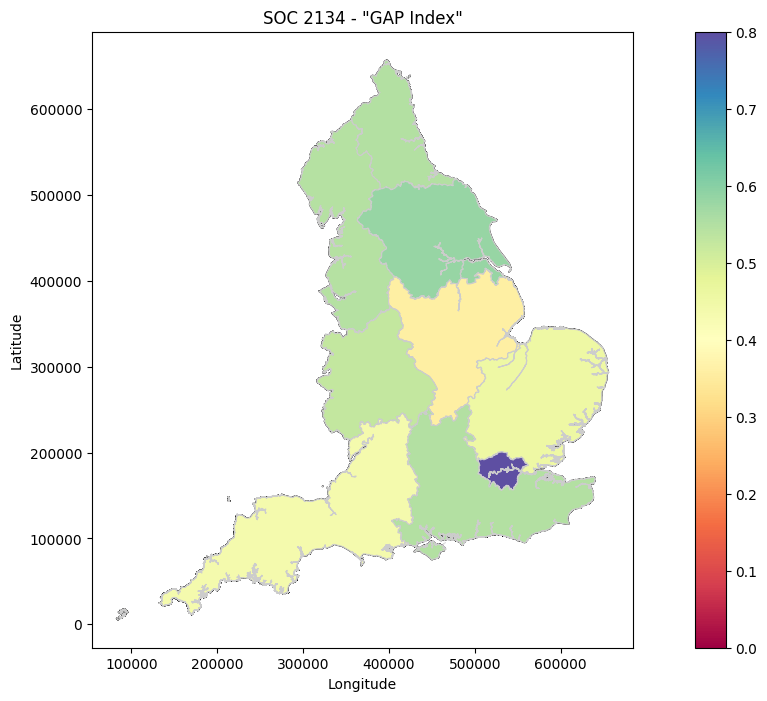

In [61]:
uk_regions = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")

uk_regions_2134 = uk_regions.merge(gap_2134, how='inner', right_on='Region', left_on = "RGN23NM")


fig, ax = plt.subplots(figsize=(16, 8))
uk_regions_2134.plot(ax=ax, color='lightgrey', edgecolor='black')

uk_regions_2134.plot(column='ADS/PROJSIZE2025', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 0, vmax = 0.8 )

plt.title('SOC 2134 - "GAP Index"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#### SOC 2132 - IT Managers

In [62]:
region_pred_21

,Region-SOC2,SOC2,NewAdsProj2025,2134_NEWADS_PROJ2025,2131_NEWADS_PROJ2025,2132_NEWADS_PROJ2025
18,East Midlands-SOC21,21,55959.0,15668.0,1635.0,6057.0
19,Yorkshire and The Humber-SOC21,21,64640.0,18098.0,1888.0,6997.0
20,South West-SOC21,21,77683.0,21750.0,2269.0,8409.0
21,North East-SOC21,21,26067.0,7298.0,761.0,2822.0
22,East of England-SOC21,21,75905.0,21252.0,2217.0,8217.0
23,West Midlands-SOC21,21,73652.0,20621.0,2152.0,7973.0
24,North West-SOC21,21,94602.0,26487.0,2764.0,10240.0
25,London-SOC21,21,325350.0,91093.0,9504.0,35218.0
26,South East-SOC21,21,141852.0,39716.0,4144.0,15355.0


In [63]:
lsip_region_SOC21

,Region-SOC2,Proj2025,SOC2,2134_Proj2025,2131_Proj2025,2132_Proj2025
2,East Midlands-SOC21,230682,21,43771.0,5852.0,24271.0
28,East of England-SOC21,246005,21,46678.0,6241.0,25884.0
54,London-SOC21,542571,21,102950.0,13764.0,57087.0
80,North East-SOC21,70064,21,13294.0,1777.0,7372.0
106,North West-SOC21,255823,21,48541.0,6490.0,26917.0
132,South East-SOC21,382282,21,72536.0,9698.0,40222.0
158,South West-SOC21,263690,21,50034.0,6689.0,27744.0
184,West Midlands-SOC21,206810,21,39241.0,5246.0,21760.0
210,Yorkshire and The Humber-SOC21,163471,21,31018.0,4147.0,17200.0


In [64]:
gap_2132 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2132_Proj2025","2132_NEWADS_PROJ2025"]]
gap_2132["ADS/PROJSIZE2025"] = gap_2132["2132_NEWADS_PROJ2025"]/gap_2132["2132_Proj2025"]
gap_2132

,Region-SOC2,SOC2_x,Proj2025,2132_Proj2025,2132_NEWADS_PROJ2025,ADS/PROJSIZE2025
0,East Midlands-SOC21,21,230682,24271.0,6057.0,0.249557
1,Yorkshire and The Humber-SOC21,21,163471,17200.0,6997.0,0.406802
2,South West-SOC21,21,263690,27744.0,8409.0,0.303093
3,North East-SOC21,21,70064,7372.0,2822.0,0.382800
4,East of England-SOC21,21,246005,25884.0,8217.0,0.317455
5,West Midlands-SOC21,21,206810,21760.0,7973.0,0.366406
6,North West-SOC21,21,255823,26917.0,10240.0,0.380429
7,London-SOC21,21,542571,57087.0,35218.0,0.616918
8,South East-SOC21,21,382282,40222.0,15355.0,0.381756


  ##### Result:

In [65]:
gap_2132 = gap_2132[["Region-SOC2","ADS/PROJSIZE2025"]]
gap_2132[['Region', 'SOC2']] = gap_2132['Region-SOC2'].str.split('-', expand=True)
gap_2132.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
gap_2132

/tmp/ipykernel_148895/2240627141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2132[['Region', 'SOC2']] = gap_2132['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/2240627141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2132[['Region', 'SOC2']] = gap_2132['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/2240627141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,ADS/PROJSIZE2025,Region
0,0.249557,East Midlands
1,0.406802,Yorkshire and The Humber
2,0.303093,South West
3,0.382800,North East
4,0.317455,East of England
5,0.366406,West Midlands
6,0.380429,North West
7,0.616918,London
8,0.381756,South East


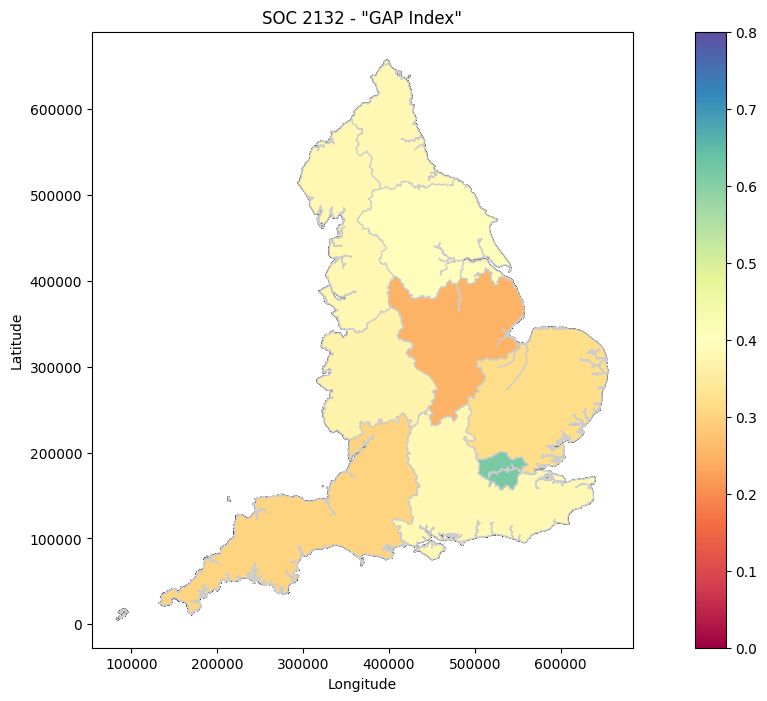

In [66]:
uk_regions_2132 = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")

uk_regions_2132 = uk_regions.merge(gap_2132, how='inner', right_on='Region', left_on = "RGN23NM")


fig, ax = plt.subplots(figsize=(16, 8))
uk_regions_2132.plot(ax=ax, color='lightgrey', edgecolor='black')

uk_regions_2132.plot(column='ADS/PROJSIZE2025', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 0, vmax = 0.8 )

plt.title('SOC 2132 - "GAP Index"')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#### SOC 2131 - IT Project Managers

In [67]:
lsip_region_SOC21

,Region-SOC2,Proj2025,SOC2,2134_Proj2025,2131_Proj2025,2132_Proj2025
2,East Midlands-SOC21,230682,21,43771.0,5852.0,24271.0
28,East of England-SOC21,246005,21,46678.0,6241.0,25884.0
54,London-SOC21,542571,21,102950.0,13764.0,57087.0
80,North East-SOC21,70064,21,13294.0,1777.0,7372.0
106,North West-SOC21,255823,21,48541.0,6490.0,26917.0
132,South East-SOC21,382282,21,72536.0,9698.0,40222.0
158,South West-SOC21,263690,21,50034.0,6689.0,27744.0
184,West Midlands-SOC21,206810,21,39241.0,5246.0,21760.0
210,Yorkshire and The Humber-SOC21,163471,21,31018.0,4147.0,17200.0


In [68]:
region_pred_21.head(9)

,Region-SOC2,SOC2,NewAdsProj2025,2134_NEWADS_PROJ2025,2131_NEWADS_PROJ2025,2132_NEWADS_PROJ2025
18,East Midlands-SOC21,21,55959.0,15668.0,1635.0,6057.0
19,Yorkshire and The Humber-SOC21,21,64640.0,18098.0,1888.0,6997.0
20,South West-SOC21,21,77683.0,21750.0,2269.0,8409.0
21,North East-SOC21,21,26067.0,7298.0,761.0,2822.0
22,East of England-SOC21,21,75905.0,21252.0,2217.0,8217.0
23,West Midlands-SOC21,21,73652.0,20621.0,2152.0,7973.0
24,North West-SOC21,21,94602.0,26487.0,2764.0,10240.0
25,London-SOC21,21,325350.0,91093.0,9504.0,35218.0
26,South East-SOC21,21,141852.0,39716.0,4144.0,15355.0


In [69]:
gap_2131 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2131_Proj2025","2131_NEWADS_PROJ2025"]]
gap_2131["ADS/PROJSIZE2025"] = gap_2131["2131_NEWADS_PROJ2025"]/gap_2131["2131_Proj2025"]
gap_2131

,Region-SOC2,SOC2_x,Proj2025,2131_Proj2025,2131_NEWADS_PROJ2025,ADS/PROJSIZE2025
0,East Midlands-SOC21,21,230682,5852.0,1635.0,0.279392
1,Yorkshire and The Humber-SOC21,21,163471,4147.0,1888.0,0.455269
2,South West-SOC21,21,263690,6689.0,2269.0,0.339214
3,North East-SOC21,21,70064,1777.0,761.0,0.428250
4,East of England-SOC21,21,246005,6241.0,2217.0,0.355232
5,West Midlands-SOC21,21,206810,5246.0,2152.0,0.410217
6,North West-SOC21,21,255823,6490.0,2764.0,0.425886
7,London-SOC21,21,542571,13764.0,9504.0,0.690497
8,South East-SOC21,21,382282,9698.0,4144.0,0.427305


  ##### Result:

In [70]:
gap_2131 = gap_2131[["Region-SOC2","ADS/PROJSIZE2025"]]
gap_2131[['Region', 'SOC2']] = gap_2131['Region-SOC2'].str.split('-', expand=True)
gap_2131.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
gap_2131

/tmp/ipykernel_148895/2263407071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2131[['Region', 'SOC2']] = gap_2131['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/2263407071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2131[['Region', 'SOC2']] = gap_2131['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/2263407071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,ADS/PROJSIZE2025,Region
0,0.279392,East Midlands
1,0.455269,Yorkshire and The Humber
2,0.339214,South West
3,0.428250,North East
4,0.355232,East of England
5,0.410217,West Midlands
6,0.425886,North West
7,0.690497,London
8,0.427305,South East


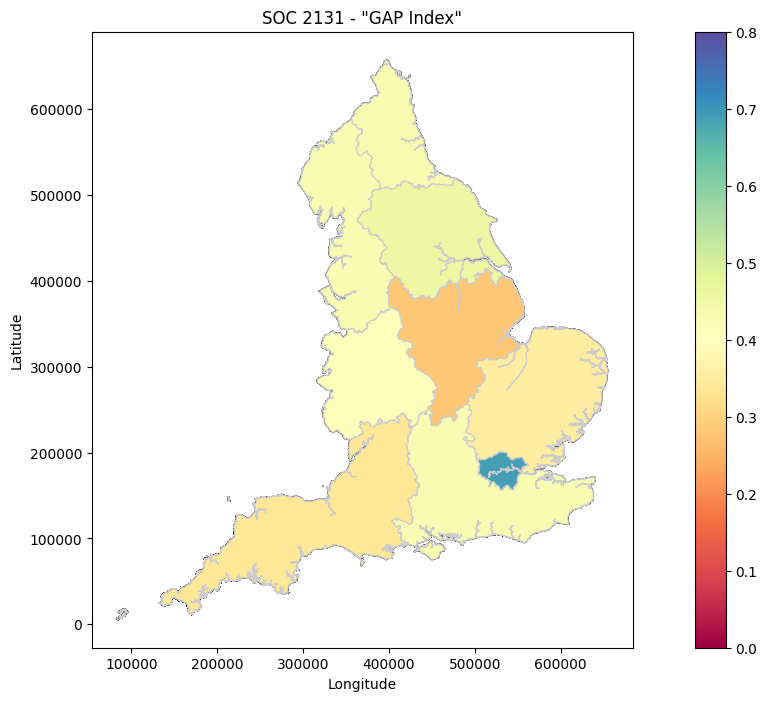

In [71]:
import geopandas as gpd

uk_regions_2131 = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")

uk_regions_2131 = uk_regions.merge(gap_2131, how='inner', right_on='Region', left_on = "RGN23NM")


fig, ax = plt.subplots(figsize=(16, 8))
uk_regions_2131.plot(ax=ax, color='lightgrey', edgecolor='black')

uk_regions_2131.plot(column='ADS/PROJSIZE2025', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 0, vmax = 0.8 )

plt.title('SOC 2131 - "GAP Index"')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### SOC 2440 -  Business and financial project management professionals 

In [72]:
region_pred_24

,Region-SOC2,SOC2,NewAdsProj2025,2440_ADS_PROJ2025
45,Yorkshire and The Humber-SOC24,24,71526.0,9514.0
46,East Midlands-SOC24,24,55841.0,7427.0
47,East of England-SOC24,24,78155.0,10395.0
48,South West-SOC24,24,80348.0,10687.0
49,South East-SOC24,24,150754.0,20052.0
50,London-SOC24,24,332852.0,44272.0
51,North East-SOC24,24,21532.0,2864.0
52,North West-SOC24,24,102990.0,13699.0
53,West Midlands-SOC24,24,76366.0,10157.0


In [73]:
lsip_region_SOC24

,Region-SOC2,Proj2025,SOC2,2440_Proj2025
5,East Midlands-SOC24,212274,24,23916.0
31,East of England-SOC24,208792,24,23524.0
57,London-SOC24,788061,24,88789.0
83,North East-SOC24,64709,24,7291.0
109,North West-SOC24,231142,24,26042.0
135,South East-SOC24,332451,24,37456.0
161,South West-SOC24,249264,24,28084.0
187,West Midlands-SOC24,186407,24,21002.0
213,Yorkshire and The Humber-SOC24,171605,24,19334.0


In [74]:
gap_2440 = region_pred_24.merge(lsip_region_SOC24, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2440_Proj2025","2440_ADS_PROJ2025"]]
gap_2440["ADS/PROJSIZE2025"] = gap_2440["2440_ADS_PROJ2025"]/gap_2440["2440_Proj2025"]
gap_2440

,Region-SOC2,SOC2_x,Proj2025,2440_Proj2025,2440_ADS_PROJ2025,ADS/PROJSIZE2025
0,Yorkshire and The Humber-SOC24,24,171605,19334.0,9514.0,0.492086
1,East Midlands-SOC24,24,212274,23916.0,7427.0,0.310545
2,East of England-SOC24,24,208792,23524.0,10395.0,0.441889
3,South West-SOC24,24,249264,28084.0,10687.0,0.380537
4,South East-SOC24,24,332451,37456.0,20052.0,0.535348
5,London-SOC24,24,788061,88789.0,44272.0,0.498620
6,North East-SOC24,24,64709,7291.0,2864.0,0.392813
7,North West-SOC24,24,231142,26042.0,13699.0,0.526035
8,West Midlands-SOC24,24,186407,21002.0,10157.0,0.483621


  ##### Results:

In [75]:
gap_2440 = gap_2440[["Region-SOC2","ADS/PROJSIZE2025"]]
gap_2440[['Region', 'SOC2']] = gap_2440['Region-SOC2'].str.split('-', expand=True)
gap_2440.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
gap_2440

/tmp/ipykernel_148895/1834713920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2440[['Region', 'SOC2']] = gap_2440['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/1834713920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2440[['Region', 'SOC2']] = gap_2440['Region-SOC2'].str.split('-', expand=True)
/tmp/ipykernel_148895/1834713920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,ADS/PROJSIZE2025,Region
0,0.492086,Yorkshire and The Humber
1,0.310545,East Midlands
2,0.441889,East of England
3,0.380537,South West
4,0.535348,South East
5,0.498620,London
6,0.392813,North East
7,0.526035,North West
8,0.483621,West Midlands


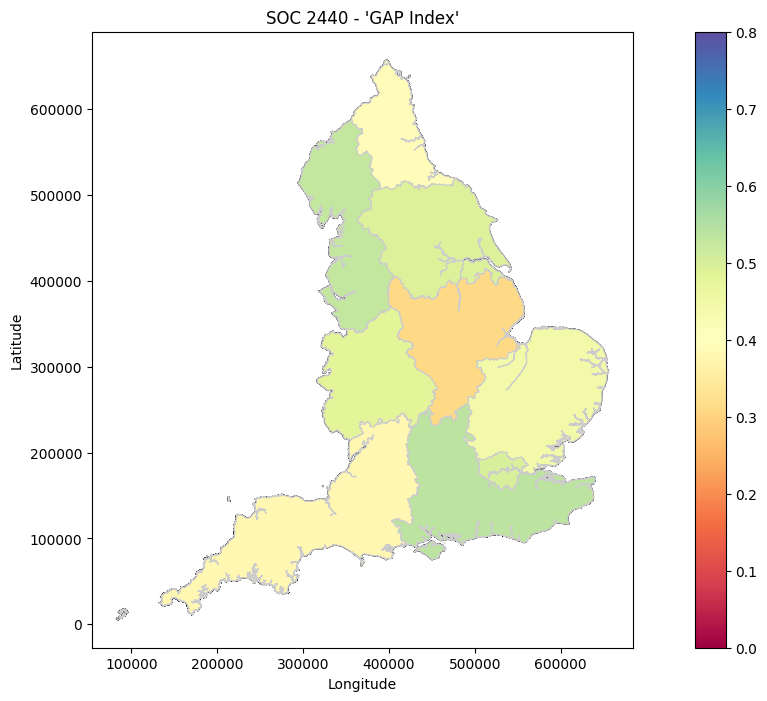

In [76]:
# Graph 2440
uk_regions_2440 = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")

uk_regions_2440 = uk_regions_2440.merge(gap_2440, how='inner', right_on='Region', left_on = "RGN23NM")


fig, ax = plt.subplots(figsize=(16, 8))
uk_regions_2440.plot(ax=ax, color='lightgrey', edgecolor='black')

uk_regions_2440.plot(column='ADS/PROJSIZE2025', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax = 0.8 )

plt.title("SOC 2440 - 'GAP Index'")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## All Plots together:

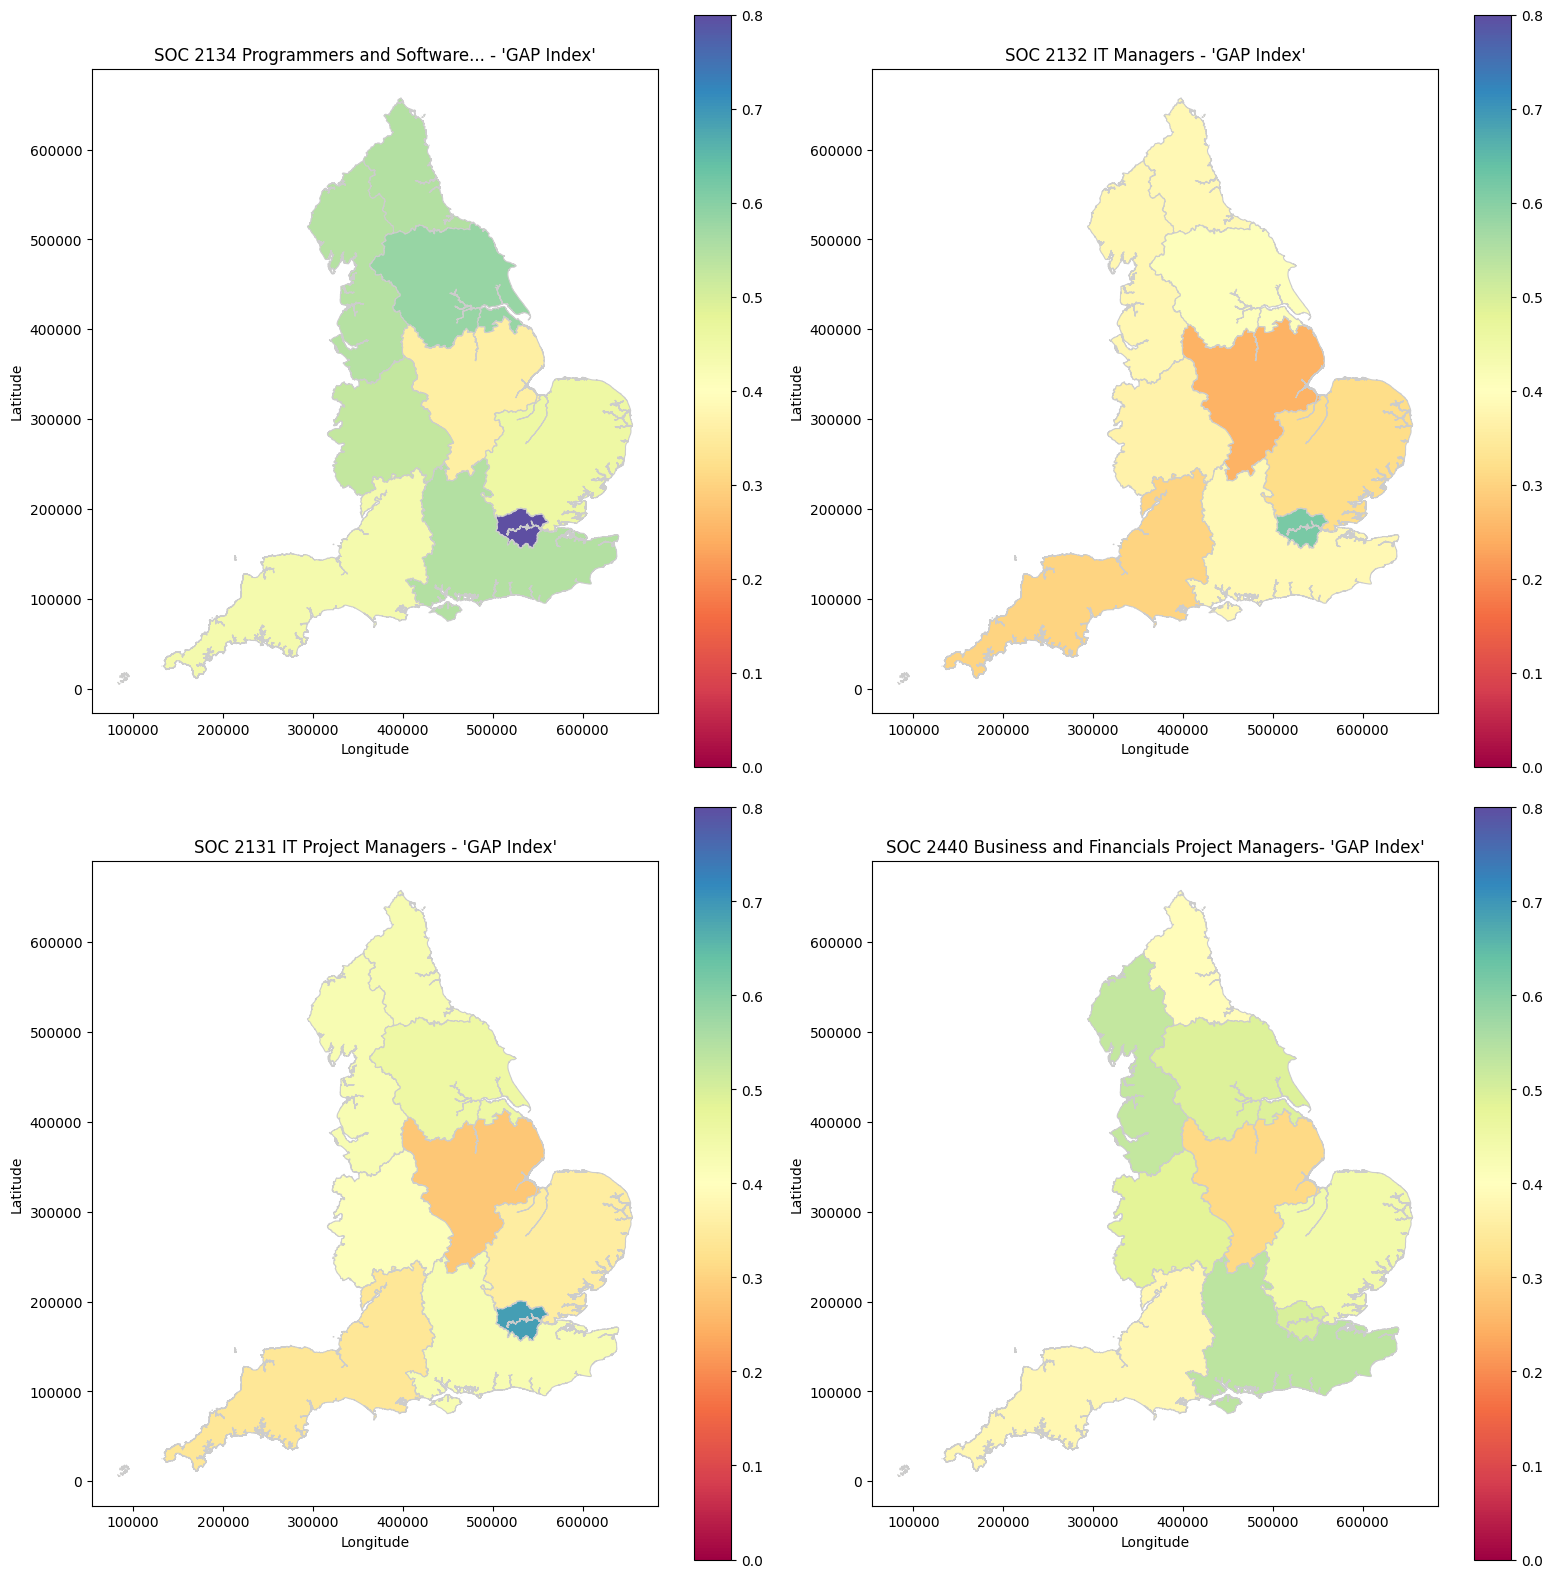

In [77]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

plots = [
    (uk_regions_2134, "SOC 2134 Programmers and Software... - 'GAP Index'"),
    (uk_regions_2132, "SOC 2132 IT Managers - 'GAP Index'"),
    (uk_regions_2131, "SOC 2131 IT Project Managers - 'GAP Index'"),
    (uk_regions_2440, "SOC 2440 Business and Financials Project Managers- 'GAP Index'")
]

for i, (data, title) in enumerate(plots):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    data.plot(column='ADS/PROJSIZE2025', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax=0.8)
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

# Show plot
plt.show()

# Importance: GAP Index * % of SOC4_Proj2025 (Size of Labour Market)

## SOC2131

In [78]:
gap_2131

,ADS/PROJSIZE2025,Region
0,0.279392,East Midlands
1,0.455269,Yorkshire and The Humber
2,0.339214,South West
3,0.428250,North East
4,0.355232,East of England
5,0.410217,West Midlands
6,0.425886,North West
7,0.690497,London
8,0.427305,South East


In [84]:
import_2131 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2131_Proj2025","2131_NEWADS_PROJ2025"]]
import_2131[['Region', 'SOC2']] = import_2131['Region-SOC2'].str.split('-', expand=True)
import_2131.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
import_2131["Weig_Proj_25"] = import_2131["2131_Proj2025"]/import_2131["2131_Proj2025"].sum()
import_2131

,SOC2_x,Proj2025,2131_Proj2025,2131_NEWADS_PROJ2025,Region,Weig_Proj_25
0,21,230682,5852.0,1635.0,East Midlands,0.097690
1,21,163471,4147.0,1888.0,Yorkshire and The Humber,0.069227
2,21,263690,6689.0,2269.0,South West,0.111662
3,21,70064,1777.0,761.0,North East,0.029664
4,21,246005,6241.0,2217.0,East of England,0.104183
5,21,206810,5246.0,2152.0,West Midlands,0.087573
6,21,255823,6490.0,2764.0,North West,0.108340
7,21,542571,13764.0,9504.0,London,0.229768
8,21,382282,9698.0,4144.0,South East,0.161892


In [86]:
gap_2131["Importance"] = import_2131["Weig_Proj_25"]* gap_2131["ADS/PROJSIZE2025"]
gap_2131

/tmp/ipykernel_148895/1514385978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2131["Importance"] = import_2131["Weig_Proj_25"]* gap_2131["ADS/PROJSIZE2025"]


,ADS/PROJSIZE2025,Region,Weig_Proj_25,Importance
0,0.279392,East Midlands,0.097690,0.027294
1,0.455269,Yorkshire and The Humber,0.069227,0.031517
2,0.339214,South West,0.111662,0.037877
3,0.428250,North East,0.029664,0.012704
4,0.355232,East of England,0.104183,0.037009
5,0.410217,West Midlands,0.087573,0.035924
6,0.425886,North West,0.108340,0.046140
7,0.690497,London,0.229768,0.158654
8,0.427305,South East,0.161892,0.069177


## SOC2132

In [87]:
gap_2132

,ADS/PROJSIZE2025,Region
0,0.249557,East Midlands
1,0.406802,Yorkshire and The Humber
2,0.303093,South West
3,0.382800,North East
4,0.317455,East of England
5,0.366406,West Midlands
6,0.380429,North West
7,0.616918,London
8,0.381756,South East


In [88]:
import_2132 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2132_Proj2025","2132_NEWADS_PROJ2025"]]
import_2132[['Region', 'SOC2']] = import_2132['Region-SOC2'].str.split('-', expand=True)
import_2132.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
import_2132["Weig_Proj_25"] = import_2132["2132_Proj2025"]/import_2132["2132_Proj2025"].sum()
import_2132

,SOC2_x,Proj2025,2132_Proj2025,2132_NEWADS_PROJ2025,Region,Weig_Proj_25
0,21,230682,24271.0,6057.0,East Midlands,0.097687
1,21,163471,17200.0,6997.0,Yorkshire and The Humber,0.069227
2,21,263690,27744.0,8409.0,South West,0.111665
3,21,70064,7372.0,2822.0,North East,0.029671
4,21,246005,25884.0,8217.0,East of England,0.104179
5,21,206810,21760.0,7973.0,West Midlands,0.087581
6,21,255823,26917.0,10240.0,North West,0.108337
7,21,542571,57087.0,35218.0,London,0.229766
8,21,382282,40222.0,15355.0,South East,0.161887


In [89]:
gap_2132["Importance"] = import_2132["Weig_Proj_25"]* gap_2132["ADS/PROJSIZE2025"]
gap_2132

/tmp/ipykernel_148895/2237129876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2132["Importance"] = import_2132["Weig_Proj_25"]* gap_2132["ADS/PROJSIZE2025"]


,ADS/PROJSIZE2025,Region,Importance
0,0.249557,East Midlands,0.024378
1,0.406802,Yorkshire and The Humber,0.028162
2,0.303093,South West,0.033845
3,0.382800,North East,0.011358
4,0.317455,East of England,0.033072
5,0.366406,West Midlands,0.032090
6,0.380429,North West,0.041214
7,0.616918,London,0.141747
8,0.381756,South East,0.061801


## SOC2134

In [87]:
gap_2134

,ADS/PROJSIZE2025,Region
0,0.249557,East Midlands
1,0.406802,Yorkshire and The Humber
2,0.303093,South West
3,0.382800,North East
4,0.317455,East of England
5,0.366406,West Midlands
6,0.380429,North West
7,0.616918,London
8,0.381756,South East


In [91]:
import_2134 = region_pred_21.merge(lsip_region_SOC21, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2134_Proj2025","2134_NEWADS_PROJ2025"]]
import_2134[['Region', 'SOC2']] = import_2134['Region-SOC2'].str.split('-', expand=True)
import_2134.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
import_2134["Weig_Proj_25"] = import_2134["2134_Proj2025"]/import_2134["2134_Proj2025"].sum()
import_2134

,SOC2_x,Proj2025,2134_Proj2025,2134_NEWADS_PROJ2025,Region,Weig_Proj_25
0,21,230682,43771.0,15668.0,East Midlands,0.097689
1,21,163471,31018.0,18098.0,Yorkshire and The Humber,0.069227
2,21,263690,50034.0,21750.0,South West,0.111667
3,21,70064,13294.0,7298.0,North East,0.029670
4,21,246005,46678.0,21252.0,East of England,0.104177
5,21,206810,39241.0,20621.0,West Midlands,0.087579
6,21,255823,48541.0,26487.0,North West,0.108335
7,21,542571,102950.0,91093.0,London,0.229767
8,21,382282,72536.0,39716.0,South East,0.161888


In [94]:
gap_2134["Importance"] = import_2134["Weig_Proj_25"]* gap_2134["ADS/PROJSIZE2025"]
gap_2134

/tmp/ipykernel_148895/4049599654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2134["Importance"] = import_2134["Weig_Proj_25"]* gap_2134["ADS/PROJSIZE2025"]


,ADS/PROJSIZE2025,Region,Importance
0,0.357954,East Midlands,0.034968
1,0.583468,Yorkshire and The Humber,0.040392
2,0.434704,South West,0.048542
3,0.548969,North East,0.016288
4,0.455289,East of England,0.047431
5,0.525496,West Midlands,0.046023
6,0.545662,North West,0.059114
7,0.884828,London,0.203304
8,0.547535,South East,0.088639


## SOC 2440

In [95]:
gap_2440

,ADS/PROJSIZE2025,Region
0,0.492086,Yorkshire and The Humber
1,0.310545,East Midlands
2,0.441889,East of England
3,0.380537,South West
4,0.535348,South East
5,0.498620,London
6,0.392813,North East
7,0.526035,North West
8,0.483621,West Midlands


In [98]:
import_2440 = region_pred_24.merge(lsip_region_SOC24, on = "Region-SOC2", how = "inner")[["Region-SOC2","SOC2_x","Proj2025", "2440_Proj2025","2440_ADS_PROJ2025"]]
import_2440[['Region', 'SOC2']] = import_2440['Region-SOC2'].str.split('-', expand=True)
import_2440.drop(columns = ["Region-SOC2","SOC2"], inplace = True)
import_2440["Weig_Proj_25"] = import_2440["2440_Proj2025"]/import_2440["2440_Proj2025"].sum()
import_2440

,SOC2_x,Proj2025,2440_Proj2025,2440_ADS_PROJ2025,Region,Weig_Proj_25
0,24,171605,19334.0,9514.0,Yorkshire and The Humber,0.070194
1,24,212274,23916.0,7427.0,East Midlands,0.086829
2,24,208792,23524.0,10395.0,East of England,0.085406
3,24,249264,28084.0,10687.0,South West,0.101961
4,24,332451,37456.0,20052.0,South East,0.135987
5,24,788061,88789.0,44272.0,London,0.322356
6,24,64709,7291.0,2864.0,North East,0.026471
7,24,231142,26042.0,13699.0,North West,0.094548
8,24,186407,21002.0,10157.0,West Midlands,0.076249


In [99]:
gap_2440["Importance"] = import_2440["Weig_Proj_25"]* gap_2440["ADS/PROJSIZE2025"]
gap_2440

/tmp/ipykernel_148895/3859302872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2440["Importance"] = import_2440["Weig_Proj_25"]* gap_2440["ADS/PROJSIZE2025"]


,ADS/PROJSIZE2025,Region,Importance
0,0.492086,Yorkshire and The Humber,0.034541
1,0.310545,East Midlands,0.026964
2,0.441889,East of England,0.037740
3,0.380537,South West,0.038800
4,0.535348,South East,0.072800
5,0.498620,London,0.160733
6,0.392813,North East,0.010398
7,0.526035,North West,0.049735
8,0.483621,West Midlands,0.036876


## Plotting all results

In [104]:
#Preparing graphs:

uk_regions_2440_import = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")
uk_regions_2440_import = uk_regions_2440_import.merge(gap_2440, how='inner', right_on='Region', left_on = "RGN23NM")

uk_regions_2134_import = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")
uk_regions_2134_import = uk_regions_2134_import.merge(gap_2134, how='inner', right_on='Region', left_on = "RGN23NM")

uk_regions_2132_import = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")
uk_regions_2132_import = uk_regions_2132_import.merge(gap_2132, how='inner', right_on='Region', left_on = "RGN23NM")

uk_regions_2131_import = gpd.read_file("Data/GIS/RGN_DEC_2023_EN_BFC.shp")
uk_regions_2131_import = uk_regions_2131_import.merge(gap_2131, how='inner', right_on='Region', left_on = "RGN23NM")


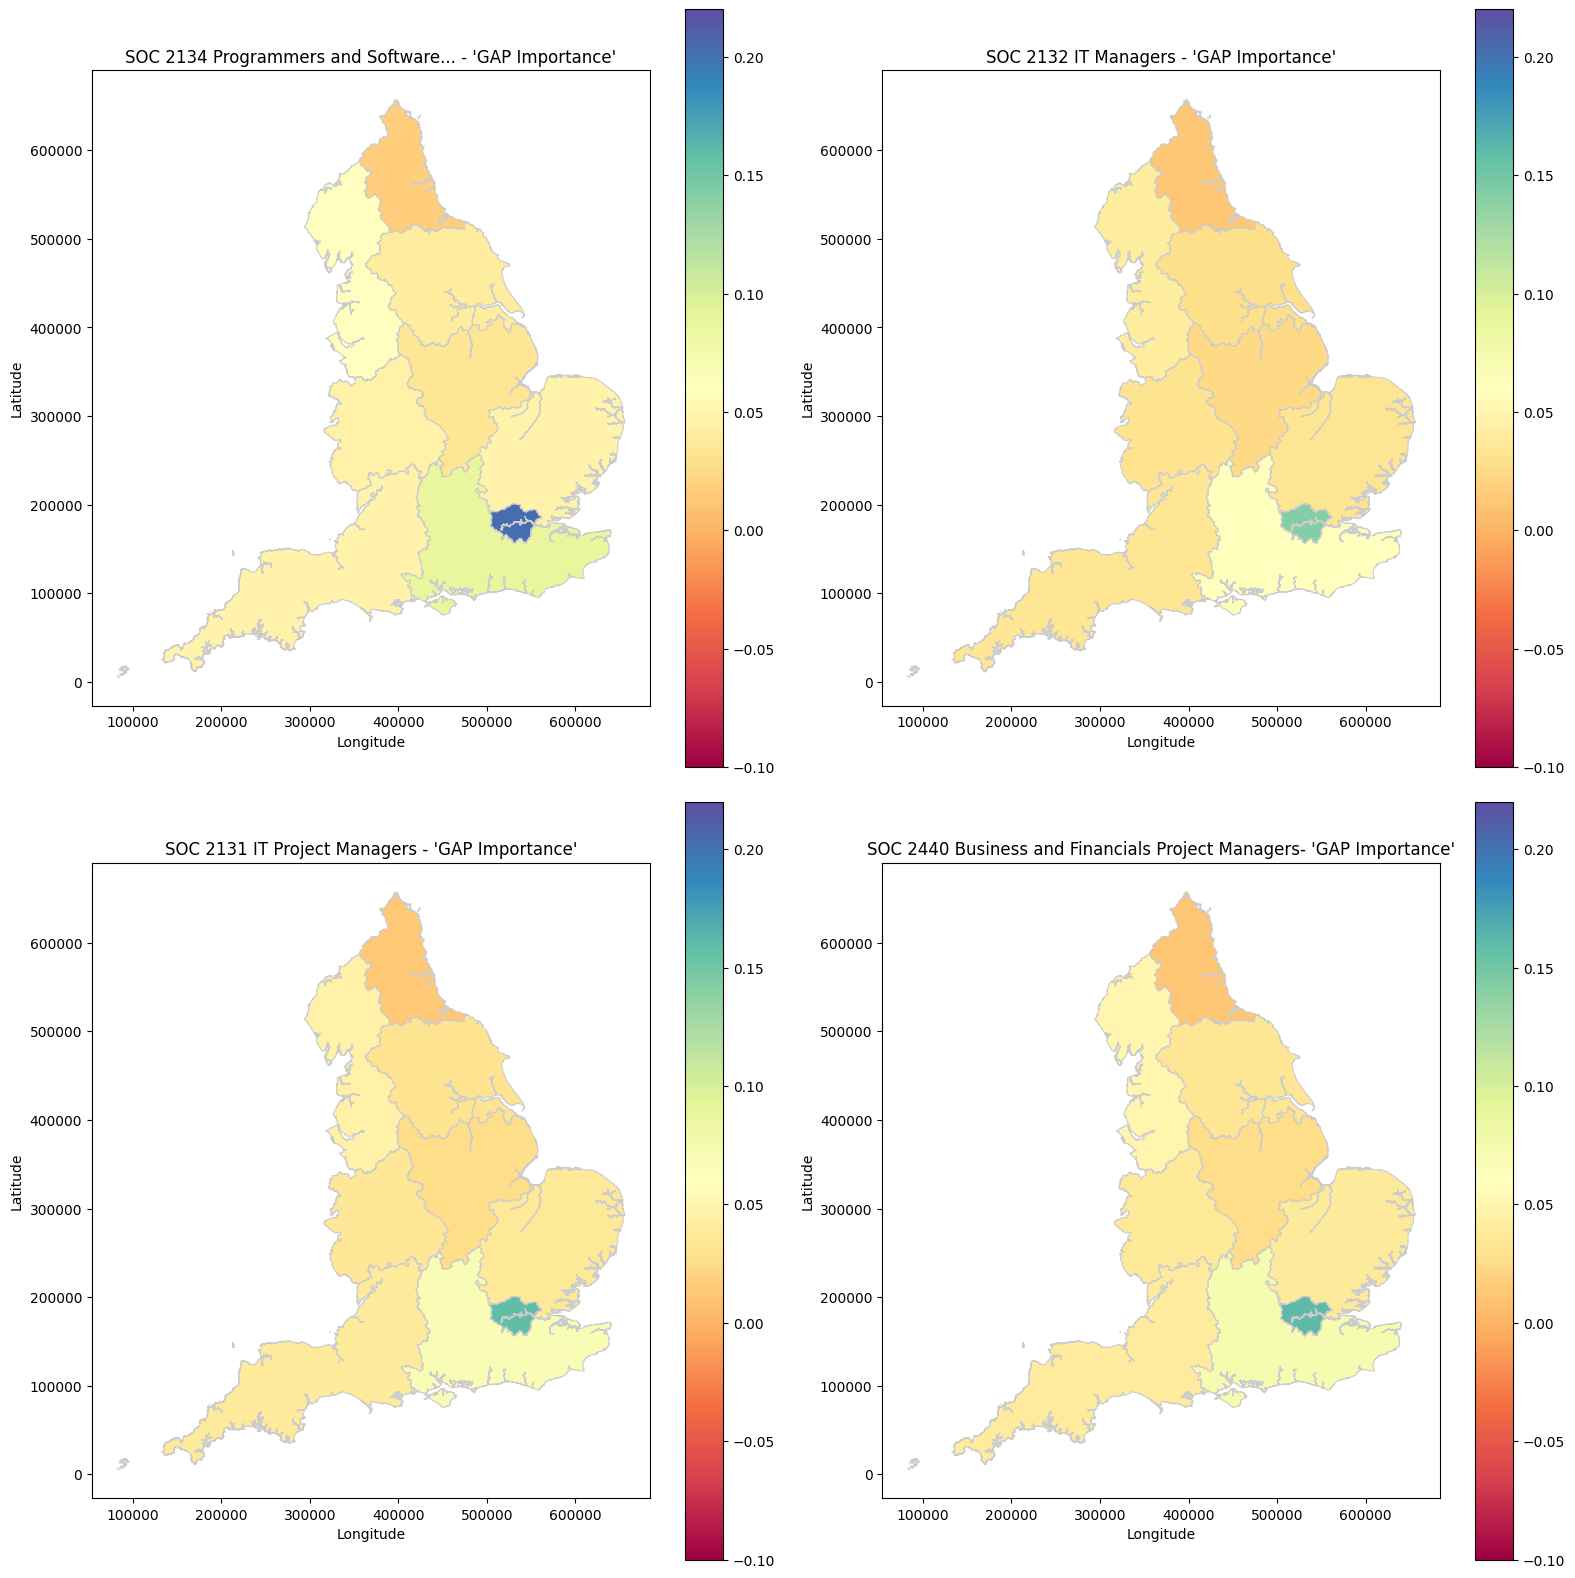

In [111]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

plots = [
    (uk_regions_2134_import, "SOC 2134 Programmers and Software... - 'GAP Importance'"),
    (uk_regions_2132_import, "SOC 2132 IT Managers - 'GAP Importance'"),
    (uk_regions_2131_import, "SOC 2131 IT Project Managers - 'GAP Importance'"),
    (uk_regions_2440_import, "SOC 2440 Business and Financials Project Managers- 'GAP Importance'")
]

for i, (data, title) in enumerate(plots):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    data.plot(column='Importance', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = -0.1 , vmax = 0.22)
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()


plt.show()